<a href="https://colab.research.google.com/github/shahdarshil123/stay-or-stray-predict-course-dropouts/blob/dev/stay_or_stray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stay or Stray: Predict Course Dropout

Objective:
To tackle the challenge of predicting student dropout from Online Courses. Despite the growing popularity of online learning platforms, high dropout rates remain a significant issue, hindering the effectiveness of these educational resources. By accurately predicting the likelihood of a student dropping out from a course, the providers and instructors can implement targeted interventions and strategies to improve student engagement and retention.

Dataset: https://www.kaggle.com/competitions/stay-or-stray/data

### Downloading the dataset from Kaggle

In [ ]:
#Installing the required libraries
!pip install opendatasets --upgrade --quiet

In [ ]:
#Import all the required libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# Defining the dataset url
dataset_url = 'https://www.kaggle.com/competitions/stay-or-stray/data'

In [ ]:
# Downloading the dataset
od.download(dataset_url)

Skipping, found downloaded files in "./stay-or-stray" (use force=True to force download)


### Exploratory Dataset

In [ ]:
cwd = os.getcwd()
cwd

'/content'

In [ ]:
os.listdir('stay-or-stray')

['log_test.csv',
 'sample_submission.csv',
 'log_train.csv',
 'test.csv',
 'train.csv']

In [ ]:
train_path = cwd+'/stay-or-stray/train.csv'
train_path

'/content/stay-or-stray/train.csv'

In [ ]:
train_df = pd.read_csv(train_path)

In [ ]:
train_df.head(10)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
0,7054.0,2.015152,0.0,32.0,NaN,4.0,NaN,NaN,7.0,6.0,...,0.0,NaN,NaN,1.0,1.0,1.0,3.0,2.0,NaN,1
1,147131.0,1.000000,NaN,2.0,NaN,NaN,0.0,NaN,6.0,5.0,...,NaN,NaN,0.0,3.0,1.0,1.0,2.0,10.0,NaN,1
2,132068.0,1.000000,NaN,1.0,NaN,2.0,NaN,0.0,9.0,1.0,...,NaN,NaN,0.0,1.0,1.0,2.0,2.0,4.0,NaN,1
3,85195.0,2.071429,0.0,1.0,NaN,2.0,NaN,NaN,8.0,7.0,...,NaN,NaN,0.0,2.0,2.0,1.0,4.0,2.0,NaN,1
4,191948.0,2.000000,NaN,2.0,0.0,2.0,NaN,NaN,14.0,2.0,...,0.0,0.0,NaN,2.0,2.0,1.0,2.0,6.0,0.0,1
5,196926.0,1.000000,NaN,1.0,NaN,2.0,NaN,0.0,6.0,3.0,...,NaN,0.0,0.0,1.0,1.0,2.0,2.0,4.0,NaN,1
6,88912.0,1.111111,NaN,15.0,NaN,1.0,NaN,NaN,9.0,1.0,...,NaN,0.0,NaN,6.0,1.0,2.0,1.0,3.0,NaN,1
7,39850.0,2.000000,NaN,72.0,0.0,1.0,NaN,NaN,63.0,4.0,...,NaN,0.0,NaN,8.0,9.0,3.0,7.0,7.0,NaN,1
8,37943.0,2.250000,NaN,2.0,0.0,2.0,0.0,NaN,8.0,1.0,...,NaN,NaN,NaN,1.0,4.0,1.0,2.0,10.0,0.0,1
9,178184.0,1.000000,NaN,2.0,NaN,1.0,0.0,NaN,6.0,6.0,...,NaN,NaN,NaN,2.0,1.0,2.0,2.0,4.0,0.0,1


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84377 entries, 0 to 84376
Columns: 141 entries, ID to label
dtypes: float64(140), int64(1)
memory usage: 90.8 MB


There are `141` columns in the training dataset and `84377` rows of data.

In [ ]:
train_df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
count,83912.000000,83959.000000,25179.0,83946.000000,25131.0,83947.000000,25137.0,25272.0,83967.000000,84008.000000,...,25084.0,25185.0,25367.0,83936.000000,83985.000000,83967.000000,83929.000000,83966.000000,24981.0,84377.000000
mean,100386.093098,1.585512,0.0,11.740988,0.0,1.906763,0.0,0.0,9.415139,9.026486,...,0.0,0.0,0.0,2.381040,2.567792,2.254326,2.334092,5.735965,0.0,0.792728
std,57993.333045,0.535283,0.0,34.643444,0.0,1.036347,0.0,0.0,17.288043,15.491942,...,0.0,0.0,0.0,2.050817,2.086498,1.989084,2.029105,2.988488,0.0,0.405355
min,5.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000
25%,50010.250000,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,3.000000,3.000000,...,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,3.000000,0.0,1.000000
50%,100614.000000,2.000000,0.0,2.000000,0.0,2.000000,0.0,0.0,6.000000,6.000000,...,0.0,0.0,0.0,2.000000,2.000000,2.000000,2.000000,6.000000,0.0,1.000000
75%,150620.250000,2.000000,0.0,6.000000,0.0,2.000000,0.0,0.0,9.000000,9.000000,...,0.0,0.0,0.0,3.000000,3.000000,2.000000,2.000000,8.000000,0.0,1.000000
max,200906.000000,7.000000,0.0,3605.000000,0.0,13.000000,0.0,0.0,487.000000,449.000000,...,0.0,0.0,0.0,83.000000,87.000000,82.000000,73.000000,30.000000,0.0,1.000000


In [ ]:
# Check which columns contains null values
train_df.isnull().any()

ID        True
X1        True
X2        True
X3        True
X4        True
         ...  
X136      True
X137      True
X138      True
X139      True
label    False
Length: 141, dtype: bool

In [ ]:
# Find the missing ID from the dataset
missing_id = len(train_df[train_df['ID'].isnull()].index)
print(f'There are {missing_id} rows of missing IDs in the training set')

There are 465 rows of missing IDs in the training set


In [ ]:
total_count = train_df.label.count()
label_0 = train_df[train_df['label']==0].label.count()
label_1 = train_df[train_df['label']==1].label.count()
print(total_count)
print(label_0)
print(label_1)

84377
17489
66888


In [ ]:
frac_0 = label_0/total_count
frac_1 = label_1/total_count
print(frac_0)
print(frac_1)

0.20727212392002559
0.7927278760799744


In [ ]:
total_missing_count = missing_df.label.count()
missing_label_0 = missing_df[missing_df['label']==0].label.count()
missing_label_1 = missing_df[missing_df['label']==1].label.count()
print(total_missing_count)
print(missing_label_0)
print(missing_label_1)

465
97
368


In [ ]:
frac_missing_0 = missing_label_0/total_missing_count
frac_missing_1 = missing_label_1/total_missing_count
print(frac_missing_0)
print(frac_missing_1)

0.2086021505376344
0.7913978494623656


In [ ]:
#train_df.dropna(subset=['ID'],inplace=True)

We have dropped the 465 rows where the id is missing.

In [ ]:
#assert(train_df['ID'].isnull().sum()==0)

In [ ]:
total_count = train_df.label.count()
label_0 = train_df[train_df['label']==0].label.count()
label_1 = train_df[train_df['label']==1].label.count()
print(total_count)
print(label_0)
print(label_1)

84377
17489
66888


In [ ]:
frac_0 = label_0/total_count
frac_1 = label_1/total_count
print(frac_0)
print(frac_1)

0.20727212392002559
0.7927278760799744


Removing the samples with missing values will not affect the dataset.

As the prediction column i.e 'label' is highly skewed for values 1 and makes the dataset highly imbalanced we need to make it balance using methods like oversampling or undersampling.

### Create Input and Output/ Target dataframes

In [ ]:
input_df = train_df.drop(['label'],axis=1)
target_df = train_df['label']

In [ ]:
total_rows = input_df.shape[0]

In [ ]:
input_df.shape

(84377, 140)

In [ ]:
target_df.shape

(84377,)

In [ ]:
# X1 = train_df['X1']
# print(X1.dtype)
# print(X1.mean())
# plt.plot(X1)

In [ ]:
# fig, axes = plt.subplots(nrows=10, ncols=14)
# input_df.plot(subplots=True, ax=axes)
# plt.show()

### Data Cleaning and Preprocessing

We have to impute the missing values using various imputation methods


In [ ]:
#checking the columns for % of missing values
top_na_columns = (input_df.isna().sum()/total_count).sort_values(ascending=False).head(49)
top_na_columns.index

Index(['X139', 'X124', 'X51', 'X70', 'X91', 'X73', 'X58', 'X94', 'X131', 'X19',
       'X23', 'X61', 'X55', 'X53', 'X40', 'X4', 'X6', 'X63', 'X106', 'X60',
       'X59', 'X38', 'X2', 'X67', 'X132', 'X89', 'X20', 'X129', 'X119', 'X46',
       'X88', 'X24', 'X93', 'X18', 'X123', 'X75', 'X66', 'X7', 'X22', 'X54',
       'X21', 'X120', 'X71', 'X133', 'X76', 'X130', 'X62', 'X68', 'X39'],
      dtype='object')

In [ ]:
input_df[top_na_columns.index].describe()


,X139,X124,X51,X70,X91,X73,X58,X94,X131,X19,...,X54,X21,X120,X71,X133,X76,X130,X62,X68,X39
count,24981.0,25044.0,25048.0,25055.0,25059.0,25060.0,25077.0,25077.0,25084.0,25093.0,...,25311.0,25327.0,25337.0,25360.0,25367.0,25385.0,25392.0,25418.0,25435.0,25436.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As the columns above are not describing any useful information about the data we can drop these columns from the data set

In [ ]:
input_df.drop(top_na_columns.index,axis=1,inplace=True)

In [ ]:
input_df.shape

(84377, 91)

In [ ]:
input_df

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,7054.0,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,...,10.0,1.0,1.0,18.0,13.0,1.0,1.0,1.0,3.0,2.0
1,147131.0,1.000000,2.0,NaN,6.0,5.0,8.0,4.0,7.0,12.0,...,1.0,1.0,1.0,9.0,4.0,3.0,1.0,1.0,2.0,10.0
2,132068.0,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0
3,85195.0,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,...,14.0,1.0,1.0,12.0,12.0,2.0,2.0,1.0,4.0,2.0
4,191948.0,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,...,2.0,1.0,1.0,14.0,3.0,2.0,2.0,1.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84372,59741.0,2.000000,2.0,1.0,NaN,8.0,9.0,9.0,8.0,18.0,...,2.0,1.0,1.0,5.0,1.0,2.0,2.0,3.0,1.0,3.0
84373,126082.0,1.142857,40.0,1.0,10.0,42.0,2.0,1.0,19.0,7.0,...,2.0,1.0,1.0,12.0,22.0,4.0,4.0,2.0,1.0,6.0
84374,31267.0,2.333333,19.0,2.0,3.0,8.0,7.0,3.0,7.0,17.0,...,10.0,1.0,1.0,9.0,168.0,2.0,2.0,17.0,5.0,11.0
84375,132418.0,2.000000,1.0,NaN,2.0,8.0,5.0,10.0,10.0,15.0,...,1.0,1.0,1.0,15.0,10.0,3.0,2.0,1.0,2.0,7.0


In [ ]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84377 entries, 0 to 84376
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      83912 non-null  float64
 1   X1      83959 non-null  float64
 2   X3      83946 non-null  float64
 3   X5      83947 non-null  float64
 4   X8      83967 non-null  float64
 5   X9      84008 non-null  float64
 6   X10     83975 non-null  float64
 7   X11     83987 non-null  float64
 8   X12     83955 non-null  float64
 9   X13     83973 non-null  float64
 10  X14     83929 non-null  float64
 11  X15     83963 non-null  float64
 12  X16     83962 non-null  float64
 13  X17     83959 non-null  float64
 14  X25     83958 non-null  float64
 15  X26     83965 non-null  float64
 16  X27     83970 non-null  float64
 17  X28     83976 non-null  float64
 18  X29     83980 non-null  float64
 19  X30     83988 non-null  float64
 20  X31     83941 non-null  float64
 21  X32     83953 non-null  float64
 22

In [ ]:
input_df.describe()

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
count,83912.000000,83959.000000,83946.000000,83947.000000,83967.000000,84008.000000,83975.000000,83987.000000,83955.000000,83973.000000,...,83945.000000,83961.000000,83936.000000,83966.000000,83943.000000,83936.000000,83985.000000,83967.000000,83929.000000,83966.000000
mean,100386.093098,1.585512,11.740988,1.906763,9.415139,9.026486,8.502042,7.922631,12.688667,12.633084,...,7.363285,1.142852,1.129956,11.095181,20.785152,2.381040,2.567792,2.254326,2.334092,5.735965
std,57993.333045,0.535283,34.643444,1.036347,17.288043,15.491942,13.644927,12.402860,12.810191,12.963943,...,22.402294,2.659613,2.491213,8.140023,38.831352,2.050817,2.086498,1.989084,2.029105,2.988488
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,50010.250000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,6.000000,6.000000,...,1.000000,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000
50%,100614.000000,2.000000,2.000000,2.000000,6.000000,6.000000,6.000000,6.000000,11.000000,11.000000,...,2.000000,1.000000,1.000000,11.000000,6.000000,2.000000,2.000000,2.000000,2.000000,6.000000
75%,150620.250000,2.000000,6.000000,2.000000,9.000000,9.000000,9.000000,9.000000,17.000000,16.000000,...,3.000000,1.000000,1.000000,16.000000,22.000000,3.000000,3.000000,2.000000,2.000000,8.000000
max,200906.000000,7.000000,3605.000000,13.000000,487.000000,449.000000,370.000000,792.000000,417.000000,653.000000,...,1123.000000,239.000000,165.000000,531.000000,3642.000000,83.000000,87.000000,82.000000,73.000000,30.000000


In [ ]:
input_df.isna().sum().sort_values()

X9      369
X110    370
X107    381
X105    386
X90     388
       ... 
X102    449
X116    453
X64     458
ID      465
X36     472
Length: 91, dtype: int64

In [ ]:
input_df.loc[:, input_df.isna().any()]

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,7054.0,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,...,10.0,1.0,1.0,18.0,13.0,1.0,1.0,1.0,3.0,2.0
1,147131.0,1.000000,2.0,NaN,6.0,5.0,8.0,4.0,7.0,12.0,...,1.0,1.0,1.0,9.0,4.0,3.0,1.0,1.0,2.0,10.0
2,132068.0,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0
3,85195.0,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,...,14.0,1.0,1.0,12.0,12.0,2.0,2.0,1.0,4.0,2.0
4,191948.0,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,...,2.0,1.0,1.0,14.0,3.0,2.0,2.0,1.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84372,59741.0,2.000000,2.0,1.0,NaN,8.0,9.0,9.0,8.0,18.0,...,2.0,1.0,1.0,5.0,1.0,2.0,2.0,3.0,1.0,3.0
84373,126082.0,1.142857,40.0,1.0,10.0,42.0,2.0,1.0,19.0,7.0,...,2.0,1.0,1.0,12.0,22.0,4.0,4.0,2.0,1.0,6.0
84374,31267.0,2.333333,19.0,2.0,3.0,8.0,7.0,3.0,7.0,17.0,...,10.0,1.0,1.0,9.0,168.0,2.0,2.0,17.0,5.0,11.0
84375,132418.0,2.000000,1.0,NaN,2.0,8.0,5.0,10.0,10.0,15.0,...,1.0,1.0,1.0,15.0,10.0,3.0,2.0,1.0,2.0,7.0


In [ ]:
input_df.std()

ID      57993.333045
X1          0.535283
X3         34.643444
X5          1.036347
X8         17.288043
            ...     
X134        2.050817
X135        2.086498
X136        1.989084
X137        2.029105
X138        2.988488
Length: 91, dtype: float64

In [ ]:
!pip install scikit-learn --upgrade --quiet

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
imput_cols = input_df.columns[input_df.columns != 'ID']
imput_cols

Index(['X1', 'X3', 'X5', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X16', 'X17', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X41', 'X42', 'X43', 'X44', 'X45',
       'X47', 'X48', 'X49', 'X50', 'X52', 'X56', 'X57', 'X64', 'X65', 'X69',
       'X72', 'X74', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84',
       'X85', 'X86', 'X87', 'X90', 'X92', 'X95', 'X96', 'X97', 'X98', 'X99',
       'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X107', 'X108', 'X109',
       'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118',
       'X121', 'X122', 'X125', 'X126', 'X127', 'X128', 'X134', 'X135', 'X136',
       'X137', 'X138'],
      dtype='object')

In [ ]:
imputer.fit(input_df[imput_cols])

SimpleImputer()

In [ ]:
print(list(imputer.statistics_))

[1.5855117845129942, 11.74098825435399, 1.9067626002120386, 9.415139280907976, 9.02648557280259, 8.502042274486454, 7.922630883350995, 12.688666547555238, 12.63308444380932, 12.55190696898569, 8.093160082417254, 8.052988256592268, 13.83142962636525, 12.464363133947927, 12.650914071339248, 12.71662498511373, 12.850088120415357, 12.793498452012384, 12.518324046292328, 12.41906815501364, 12.467690255261873, 12.566521355916054, 12.744222338701992, 12.7185519607376, 2.238424408557297, 10.132216347527866, 11.176522422539236, 10.173100753026404, 10.701429762897654, 2.238882934381327, 12.504930097411103, 11.031371380912665, 11.23663431191568, 27.01405414418599, 1.0009049127235492, 7.731510047527724, 7.316166195178879, 6.305293872446853, 1.0000271934994702, 1.0052115595368563, 1.0053785989410193, 10.774770696843358, 2480.7693068009958, 6.824397993226221, 9.021036832324773, 9.1823780989028, 8.278190025846564, 12.029473082283985, 9.518055787141803, 8.967389621371828, 8.999464062406956, 8.84953485

In [ ]:
print(list(np.round(imputer.statistics_,0)))

[2.0, 12.0, 2.0, 9.0, 9.0, 9.0, 8.0, 13.0, 13.0, 13.0, 8.0, 8.0, 14.0, 12.0, 13.0, 13.0, 13.0, 13.0, 13.0, 12.0, 12.0, 13.0, 13.0, 13.0, 2.0, 10.0, 11.0, 10.0, 11.0, 2.0, 13.0, 11.0, 11.0, 27.0, 1.0, 8.0, 7.0, 6.0, 1.0, 1.0, 1.0, 11.0, 2481.0, 7.0, 9.0, 9.0, 8.0, 12.0, 10.0, 9.0, 9.0, 9.0, 9.0, 10.0, 5.0, 9.0, 7.0, 9.0, 10.0, 11.0, 8.0, 8.0, 10.0, 12.0, 11.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 12.0, 13.0, 4.0, 13.0, 13.0, 9.0, 5.0, 7.0, 1.0, 1.0, 11.0, 21.0, 2.0, 3.0, 2.0, 2.0, 6.0]


In [ ]:
print(list(imputer.statistics_))

[1.5855117845129942, 11.74098825435399, 1.9067626002120386, 9.415139280907976, 9.02648557280259, 8.502042274486454, 7.922630883350995, 12.688666547555238, 12.63308444380932, 12.55190696898569, 8.093160082417254, 8.052988256592268, 13.83142962636525, 12.464363133947927, 12.650914071339248, 12.71662498511373, 12.850088120415357, 12.793498452012384, 12.518324046292328, 12.41906815501364, 12.467690255261873, 12.566521355916054, 12.744222338701992, 12.7185519607376, 2.238424408557297, 10.132216347527866, 11.176522422539236, 10.173100753026404, 10.701429762897654, 2.238882934381327, 12.504930097411103, 11.031371380912665, 11.23663431191568, 27.01405414418599, 1.0009049127235492, 7.731510047527724, 7.316166195178879, 6.305293872446853, 1.0000271934994702, 1.0052115595368563, 1.0053785989410193, 10.774770696843358, 2480.7693068009958, 6.824397993226221, 9.021036832324773, 9.1823780989028, 8.278190025846564, 12.029473082283985, 9.518055787141803, 8.967389621371828, 8.999464062406956, 8.84953485

In [ ]:
imputer.statistics_ = np.round(imputer.statistics_,0)

In [ ]:
input_df[imput_cols] = imputer.transform(input_df[imput_cols])

In [ ]:
input_df.shape

(84377, 91)

In [ ]:
input_df = input_df.reset_index(drop=True)

In [ ]:
input_df

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,7054.0,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,...,10.0,1.0,1.0,18.0,13.0,1.0,1.0,1.0,3.0,2.0
1,147131.0,1.000000,2.0,2.0,6.0,5.0,8.0,4.0,7.0,12.0,...,1.0,1.0,1.0,9.0,4.0,3.0,1.0,1.0,2.0,10.0
2,132068.0,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0
3,85195.0,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,...,14.0,1.0,1.0,12.0,12.0,2.0,2.0,1.0,4.0,2.0
4,191948.0,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,...,2.0,1.0,1.0,14.0,3.0,2.0,2.0,1.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84372,59741.0,2.000000,2.0,1.0,9.0,8.0,9.0,9.0,8.0,18.0,...,2.0,1.0,1.0,5.0,1.0,2.0,2.0,3.0,1.0,3.0
84373,126082.0,1.142857,40.0,1.0,10.0,42.0,2.0,1.0,19.0,7.0,...,2.0,1.0,1.0,12.0,22.0,4.0,4.0,2.0,1.0,6.0
84374,31267.0,2.333333,19.0,2.0,3.0,8.0,7.0,3.0,7.0,17.0,...,10.0,1.0,1.0,9.0,168.0,2.0,2.0,17.0,5.0,11.0
84375,132418.0,2.000000,1.0,2.0,2.0,8.0,5.0,10.0,10.0,15.0,...,1.0,1.0,1.0,15.0,10.0,3.0,2.0,1.0,2.0,7.0


In [ ]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84377 entries, 0 to 84376
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      83912 non-null  float64
 1   X1      84377 non-null  float64
 2   X3      84377 non-null  float64
 3   X5      84377 non-null  float64
 4   X8      84377 non-null  float64
 5   X9      84377 non-null  float64
 6   X10     84377 non-null  float64
 7   X11     84377 non-null  float64
 8   X12     84377 non-null  float64
 9   X13     84377 non-null  float64
 10  X14     84377 non-null  float64
 11  X15     84377 non-null  float64
 12  X16     84377 non-null  float64
 13  X17     84377 non-null  float64
 14  X25     84377 non-null  float64
 15  X26     84377 non-null  float64
 16  X27     84377 non-null  float64
 17  X28     84377 non-null  float64
 18  X29     84377 non-null  float64
 19  X30     84377 non-null  float64
 20  X31     84377 non-null  float64
 21  X32     84377 non-null  float64
 22

In [ ]:
input_df.describe()

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
count,83912.000000,84377.000000,84377.000000,84377.000000,84377.000000,84377.00000,84377.000000,84377.000000,84377.000000,84377.000000,...,84377.000000,84377.000000,84377.000000,84377.000000,84377.000000,84377.000000,84377.000000,84377.000000,84377.000000,84377.000000
mean,100386.093098,1.587565,11.742311,1.907238,9.413122,9.02637,8.504415,7.922988,12.690224,12.634841,...,7.361426,1.142148,1.129277,11.094718,20.786257,2.379049,2.569800,2.253090,2.332318,5.737251
std,57993.333045,0.534748,34.554855,1.033724,17.246013,15.45803,13.612426,12.374164,12.778135,12.932895,...,22.344886,2.653068,2.484712,8.120177,38.731359,2.045635,2.081853,1.984325,2.023857,2.981257
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,50010.250000,1.000000,1.000000,1.000000,3.000000,3.00000,3.000000,3.000000,6.000000,6.000000,...,1.000000,1.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000
50%,100614.000000,2.000000,2.000000,2.000000,6.000000,6.00000,6.000000,6.000000,11.000000,11.000000,...,2.000000,1.000000,1.000000,11.000000,6.000000,2.000000,2.000000,2.000000,2.000000,6.000000
75%,150620.250000,2.000000,6.000000,2.000000,9.000000,9.00000,9.000000,9.000000,17.000000,16.000000,...,3.000000,1.000000,1.000000,16.000000,21.000000,3.000000,3.000000,2.000000,2.000000,8.000000
max,200906.000000,7.000000,3605.000000,13.000000,487.000000,449.00000,370.000000,792.000000,417.000000,653.000000,...,1123.000000,239.000000,165.000000,531.000000,3642.000000,83.000000,87.000000,82.000000,73.000000,30.000000


In [ ]:
input_df.isna().sum()

ID      465
X1        0
X3        0
X5        0
X8        0
       ... 
X134      0
X135      0
X136      0
X137      0
X138      0
Length: 91, dtype: int64

### Spliting the dataset into train and validation dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_input_df, val_input_df = train_test_split(input_df,test_size=0.25,random_state=42,shuffle=False)
train_label_df, val_label_df = train_test_split(target_df,test_size=0.25, random_state=42, shuffle=False)

In [ ]:
print(train_input_df.shape)
print(train_label_df.shape)

(63282, 91)
(63282,)


In [ ]:
train_input_df

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,7054.0,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,...,10.0,1.0,1.0,18.0,13.0,1.0,1.0,1.0,3.0,2.0
1,147131.0,1.000000,2.0,2.0,6.0,5.0,8.0,4.0,7.0,12.0,...,1.0,1.0,1.0,9.0,4.0,3.0,1.0,1.0,2.0,10.0
2,132068.0,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0
3,85195.0,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,...,14.0,1.0,1.0,12.0,12.0,2.0,2.0,1.0,4.0,2.0
4,191948.0,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,...,2.0,1.0,1.0,14.0,3.0,2.0,2.0,1.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63277,116760.0,1.200000,11.0,2.0,7.0,7.0,6.0,1.0,16.0,20.0,...,1.0,6.0,25.0,12.0,56.0,4.0,2.0,6.0,5.0,5.0
63278,155994.0,2.000000,1.0,2.0,6.0,4.0,5.0,8.0,14.0,18.0,...,1.0,1.0,1.0,17.0,9.0,2.0,2.0,1.0,1.0,6.0
63279,113629.0,2.000000,2.0,1.0,7.0,4.0,6.0,7.0,7.0,4.0,...,1.0,1.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,3.0
63280,179935.0,1.000000,13.0,2.0,2.0,2.0,3.0,2.0,7.0,6.0,...,1.0,1.0,1.0,11.0,4.0,1.0,1.0,3.0,1.0,5.0


In [ ]:
train_label_df

0        1
1        1
2        1
3        1
4        1
        ..
63277    0
63278    1
63279    1
63280    1
63281    1
Name: label, Length: 63282, dtype: int64

In [ ]:
print(val_input_df.shape)
print(val_label_df.shape)

(21095, 91)
(21095,)


### Scaling the numeric columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
train_columns = train_input_df.columns[train_input_df.columns != 'ID']
train_columns

Index(['X1', 'X3', 'X5', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15',
       'X16', 'X17', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32',
       'X33', 'X34', 'X35', 'X36', 'X37', 'X41', 'X42', 'X43', 'X44', 'X45',
       'X47', 'X48', 'X49', 'X50', 'X52', 'X56', 'X57', 'X64', 'X65', 'X69',
       'X72', 'X74', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84',
       'X85', 'X86', 'X87', 'X90', 'X92', 'X95', 'X96', 'X97', 'X98', 'X99',
       'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X107', 'X108', 'X109',
       'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118',
       'X121', 'X122', 'X125', 'X126', 'X127', 'X128', 'X134', 'X135', 'X136',
       'X137', 'X138'],
      dtype='object')

In [ ]:
scaler.fit(train_input_df[train_columns])

MinMaxScaler()

In [ ]:
train_input_df[train_columns] = scaler.transform(train_input_df[train_columns])
val_input_df[train_columns] = scaler.transform(val_input_df[train_columns])

In [ ]:
train_input_df

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,7054.0,0.169192,0.008602,0.250000,0.013605,0.011161,0.002890,0.005057,0.002404,0.021472,...,0.008021,0.000000,0.000000,0.032075,0.003296,0.000000,0.000000,0.000000,0.027778,0.034483
1,147131.0,0.000000,0.000277,0.083333,0.011338,0.008929,0.020231,0.003793,0.014423,0.016871,...,0.000000,0.000000,0.000000,0.015094,0.000824,0.024390,0.000000,0.000000,0.013889,0.310345
2,132068.0,0.000000,0.000000,0.083333,0.018141,0.000000,0.017341,0.011378,0.014423,0.024540,...,0.000000,0.000000,0.000000,0.001887,0.000000,0.000000,0.000000,0.012346,0.013889,0.103448
3,85195.0,0.178571,0.000000,0.083333,0.015873,0.013393,0.023121,0.003793,0.040865,0.010736,...,0.011586,0.000000,0.000000,0.020755,0.003021,0.012195,0.011628,0.000000,0.041667,0.034483
4,191948.0,0.166667,0.000277,0.083333,0.029478,0.002232,0.002890,0.003793,0.007212,0.003067,...,0.000891,0.000000,0.000000,0.024528,0.000549,0.012195,0.011628,0.000000,0.013889,0.172414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63277,116760.0,0.033333,0.002775,0.083333,0.013605,0.013393,0.014451,0.000000,0.036058,0.029141,...,0.000000,0.021008,0.146341,0.020755,0.015106,0.036585,0.011628,0.061728,0.055556,0.137931
63278,155994.0,0.166667,0.000000,0.083333,0.011338,0.006696,0.011561,0.008850,0.031250,0.026074,...,0.000000,0.000000,0.000000,0.030189,0.002197,0.012195,0.011628,0.000000,0.000000,0.172414
63279,113629.0,0.166667,0.000277,0.000000,0.013605,0.006696,0.014451,0.007585,0.014423,0.004601,...,0.000000,0.000000,0.000000,0.005660,0.000000,0.012195,0.000000,0.000000,0.000000,0.068966
63280,179935.0,0.000000,0.003330,0.083333,0.002268,0.002232,0.005780,0.001264,0.014423,0.007669,...,0.000000,0.000000,0.000000,0.018868,0.000824,0.000000,0.000000,0.024691,0.000000,0.137931


In [ ]:
train_input_df.describe()

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
count,62922.000000,63282.000000,63282.000000,63282.000000,63282.000000,63282.000000,63282.000000,63282.000000,63282.000000,63282.000000,...,63282.000000,63282.000000,63282.000000,63282.000000,63282.000000,63282.000000,63282.000000,63282.000000,63282.000000,63282.000000
mean,100232.789263,0.098062,0.002991,0.075977,0.019229,0.017912,0.021764,0.008722,0.028087,0.017826,...,0.005729,0.000590,0.000788,0.019109,0.005447,0.016851,0.018286,0.015470,0.018582,0.163468
std,57898.008009,0.089107,0.009967,0.086539,0.039504,0.034288,0.039297,0.015611,0.030467,0.020018,...,0.020314,0.011299,0.015346,0.015880,0.010798,0.025231,0.024336,0.024620,0.028356,0.102970
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50045.000000,0.000000,0.000000,0.000000,0.004535,0.004464,0.005780,0.002528,0.012019,0.007669,...,0.000000,0.000000,0.000000,0.009434,0.000275,0.000000,0.000000,0.000000,0.000000,0.068966
50%,100455.000000,0.166667,0.000277,0.083333,0.011338,0.011161,0.014451,0.006321,0.024038,0.015337,...,0.000891,0.000000,0.000000,0.018868,0.001373,0.012195,0.011628,0.012346,0.013889,0.172414
75%,150231.500000,0.166667,0.001387,0.083333,0.018141,0.017857,0.023121,0.010114,0.038462,0.023006,...,0.001783,0.000000,0.000000,0.028302,0.005768,0.024390,0.023256,0.012346,0.013889,0.241379
max,200906.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the model using Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_input_df[train_columns],train_label_df)

LogisticRegression(solver='liblinear')

In [ ]:
input_df

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,7054.0,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,...,10.0,1.0,1.0,18.0,13.0,1.0,1.0,1.0,3.0,2.0
1,147131.0,1.000000,2.0,2.0,6.0,5.0,8.0,4.0,7.0,12.0,...,1.0,1.0,1.0,9.0,4.0,3.0,1.0,1.0,2.0,10.0
2,132068.0,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0
3,85195.0,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,...,14.0,1.0,1.0,12.0,12.0,2.0,2.0,1.0,4.0,2.0
4,191948.0,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,...,2.0,1.0,1.0,14.0,3.0,2.0,2.0,1.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84372,59741.0,2.000000,2.0,1.0,9.0,8.0,9.0,9.0,8.0,18.0,...,2.0,1.0,1.0,5.0,1.0,2.0,2.0,3.0,1.0,3.0
84373,126082.0,1.142857,40.0,1.0,10.0,42.0,2.0,1.0,19.0,7.0,...,2.0,1.0,1.0,12.0,22.0,4.0,4.0,2.0,1.0,6.0
84374,31267.0,2.333333,19.0,2.0,3.0,8.0,7.0,3.0,7.0,17.0,...,10.0,1.0,1.0,9.0,168.0,2.0,2.0,17.0,5.0,11.0
84375,132418.0,2.000000,1.0,2.0,2.0,8.0,5.0,10.0,10.0,15.0,...,1.0,1.0,1.0,15.0,10.0,3.0,2.0,1.0,2.0,7.0


In [ ]:
model.coef_

array([[-5.73929411e-02, -1.17605413e+00, -1.16963796e+00,
         1.20499838e+00,  6.20027228e-01, -2.09661237e-01,
         1.85479789e-01,  5.03756393e-01,  8.49106471e-01,
        -4.56644559e-03,  9.37550254e-01,  9.04584971e-01,
         2.57386741e-01, -5.36453328e-01,  2.97429781e-01,
        -1.49455250e-01,  8.30388220e-01,  1.24106797e+00,
         6.78539366e-01,  5.90599214e-02,  5.74023378e-02,
         8.37092689e-01,  7.78470959e-01, -5.16981595e+00,
        -2.63960965e-02,  2.04885250e+00, -9.09398234e-01,
        -1.67619129e+00, -2.14359658e+00, -3.49360636e-01,
        -1.94503416e+00, -8.66664581e-01, -1.40741704e+00,
        -6.42609027e-01,  2.10211954e-01,  3.17120753e+00,
        -2.30808821e+00,  2.02184548e+00, -3.68943687e-01,
         3.72638679e-01, -1.08924757e-01,  8.66299798e-02,
        -4.06525567e-01, -2.31567270e+00, -5.87828619e-01,
        -6.35007840e-01, -1.15370124e+00, -1.23881342e+00,
        -3.30074040e-01, -4.16928424e-01, -4.69041575e-0

In [ ]:
weights_df = pd.DataFrame(data ={'Feature':np.array(input_df[imput_cols].columns),'weight':np.array(model.coef_.tolist()).reshape(90,)})


,Feature,weight
80,X122,5.200819
35,X52,3.171208
25,X37,2.048853
37,X57,2.021845
56,X95,1.687820
...,...,...
55,X92,-5.791739
78,X118,-5.989049
88,X137,-6.615159
77,X117,-6.880073


In [ ]:
weights_df.sort_values(by=['weight'],ascending=False).head(10)

,Feature,weight
80,X122,5.200819
35,X52,3.171208
25,X37,2.048853
37,X57,2.021845
56,X95,1.687820
17,X29,1.241068
3,X8,1.204998
10,X15,0.937550
11,X16,0.904585
8,X13,0.849106


In [ ]:
print(np.array(model.coef_.tolist()).shape)

(1, 90)


In [ ]:
print(model.intercept_)

[3.62604837]


In [ ]:
train_preds = model.predict(train_input_df[train_columns])
train_preds

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_label_df,train_preds)

0.8699788249423217

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cf = confusion_matrix(train_label_df, train_preds, normalize='true')

In [ ]:
val_preds = model.predict(val_input_df[train_columns])
val_preds

array([0, 1, 1, ..., 0, 1, 1])

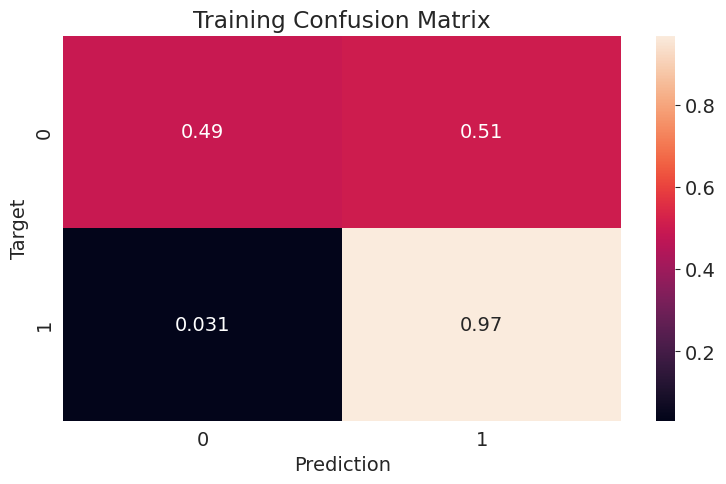

In [ ]:
  plt.figure()
  sns.heatmap(cf, annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format('Training'));

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(train_label_df,train_preds)

0.9219028816583773

### Model Prediction on Validation Dataset

In [ ]:
accuracy_score(val_label_df,val_preds)

0.86674567433041

In [ ]:
f1_score(val_label_df,val_preds)

0.9201397766982017

### Model Predictions on Testing data

In [ ]:
# test data
test_path = cwd+'/stay-or-stray/test.csv'


In [ ]:
test_df = pd.read_csv(test_path)
test_df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139
0,17547.0,1.272727,0.0,1.0,0.0,3.0,0.0,0.0,7.0,26.0,...,NaN,NaN,NaN,0.0,2.0,6.0,2.0,4.0,3.0,NaN
1,140449.0,1.000000,0.0,1.0,NaN,1.0,NaN,0.0,8.0,4.0,...,0.0,0.0,NaN,0.0,3.0,2.0,2.0,2.0,5.0,NaN
2,182658.0,2.000000,NaN,2.0,NaN,2.0,NaN,0.0,64.0,2.0,...,NaN,NaN,NaN,NaN,2.0,4.0,1.0,1.0,7.0,0.0
3,149652.0,1.000000,0.0,1.0,NaN,1.0,0.0,0.0,9.0,9.0,...,NaN,NaN,NaN,NaN,3.0,1.0,1.0,2.0,7.0,NaN
4,106304.0,2.000000,NaN,2.0,NaN,3.0,NaN,0.0,1.0,6.0,...,NaN,NaN,NaN,0.0,1.0,2.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,102422.0,1.000000,NaN,2.0,NaN,1.0,NaN,NaN,10.0,7.0,...,NaN,0.0,NaN,0.0,3.0,1.0,1.0,2.0,3.0,NaN
35978,129387.0,2.076923,0.0,1.0,0.0,3.0,0.0,0.0,6.0,5.0,...,NaN,NaN,NaN,0.0,2.0,2.0,2.0,2.0,2.0,0.0
35979,131835.0,1.000000,NaN,1.0,0.0,1.0,NaN,NaN,7.0,9.0,...,NaN,NaN,NaN,NaN,3.0,1.0,2.0,1.0,7.0,NaN
35980,68715.0,1.500000,NaN,23.0,0.0,6.0,NaN,NaN,2.0,22.0,...,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,9.0,NaN


In [ ]:
# Drop the columns
test_df.drop(top_na_columns.index,axis=1,inplace=True)

In [ ]:
test_df.shape

(35982, 91)

In [ ]:
# Impute the missing data
test_df[imput_cols] = imputer.transform(test_df[imput_cols])

In [ ]:
test_df.isna().sum()

ID      0
X1      0
X3      0
X5      0
X8      0
       ..
X134    0
X135    0
X136    0
X137    0
X138    0
Length: 91, dtype: int64

In [ ]:
test_df

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,17547.0,1.272727,1.0,3.0,7.0,26.0,48.0,8.0,8.0,9.0,...,10.0,1.0,1.0,19.0,42.0,2.0,6.0,2.0,4.0,3.0
1,140449.0,1.000000,1.0,1.0,8.0,4.0,5.0,3.0,1.0,6.0,...,1.0,1.0,1.0,17.0,3.0,3.0,2.0,2.0,2.0,5.0
2,182658.0,2.000000,2.0,2.0,64.0,2.0,7.0,8.0,14.0,19.0,...,13.0,1.0,1.0,16.0,12.0,2.0,4.0,1.0,1.0,7.0
3,149652.0,1.000000,1.0,1.0,9.0,9.0,10.0,1.0,15.0,19.0,...,2.0,1.0,1.0,16.0,3.0,3.0,1.0,1.0,2.0,7.0
4,106304.0,2.000000,2.0,3.0,1.0,6.0,4.0,2.0,4.0,4.0,...,1.0,1.0,1.0,7.0,1.0,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,102422.0,1.000000,2.0,1.0,10.0,7.0,9.0,10.0,2.0,19.0,...,1.0,1.0,1.0,7.0,3.0,3.0,1.0,1.0,2.0,3.0
35978,129387.0,2.076923,1.0,3.0,6.0,5.0,9.0,7.0,13.0,4.0,...,3.0,1.0,1.0,2.0,19.0,2.0,2.0,2.0,2.0,2.0
35979,131835.0,1.000000,1.0,1.0,7.0,9.0,4.0,9.0,8.0,18.0,...,1.0,1.0,1.0,5.0,6.0,3.0,1.0,2.0,1.0,7.0
35980,68715.0,1.500000,23.0,6.0,2.0,22.0,7.0,8.0,17.0,19.0,...,2.0,1.0,1.0,16.0,9.0,1.0,4.0,1.0,1.0,9.0


In [ ]:
#Scale the testing data
test_df[train_columns] = scaler.transform(test_df[train_columns])

In [ ]:
test_df

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,17547.0,0.045455,0.000000,0.166667,0.013605,0.055804,0.135838,0.008850,0.016827,0.012270,...,0.008021,0.0,0.0,0.033962,0.011261,0.012195,0.058140,0.012346,0.041667,0.068966
1,140449.0,0.000000,0.000000,0.000000,0.015873,0.006696,0.011561,0.002528,0.000000,0.007669,...,0.000000,0.0,0.0,0.030189,0.000549,0.024390,0.011628,0.012346,0.013889,0.137931
2,182658.0,0.166667,0.000277,0.083333,0.142857,0.002232,0.017341,0.008850,0.031250,0.027607,...,0.010695,0.0,0.0,0.028302,0.003021,0.012195,0.034884,0.000000,0.000000,0.206897
3,149652.0,0.000000,0.000000,0.000000,0.018141,0.017857,0.026012,0.000000,0.033654,0.027607,...,0.000891,0.0,0.0,0.028302,0.000549,0.024390,0.000000,0.000000,0.013889,0.206897
4,106304.0,0.166667,0.000277,0.166667,0.000000,0.011161,0.008671,0.001264,0.007212,0.004601,...,0.000000,0.0,0.0,0.011321,0.000000,0.000000,0.011628,0.012346,0.013889,0.034483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,102422.0,0.000000,0.000277,0.000000,0.020408,0.013393,0.023121,0.011378,0.002404,0.027607,...,0.000000,0.0,0.0,0.011321,0.000549,0.024390,0.000000,0.000000,0.013889,0.068966
35978,129387.0,0.179487,0.000000,0.166667,0.011338,0.008929,0.023121,0.007585,0.028846,0.004601,...,0.001783,0.0,0.0,0.001887,0.004944,0.012195,0.011628,0.012346,0.013889,0.034483
35979,131835.0,0.000000,0.000000,0.000000,0.013605,0.017857,0.008671,0.010114,0.016827,0.026074,...,0.000000,0.0,0.0,0.007547,0.001373,0.024390,0.000000,0.012346,0.000000,0.206897
35980,68715.0,0.083333,0.006104,0.416667,0.002268,0.046875,0.017341,0.008850,0.038462,0.027607,...,0.000891,0.0,0.0,0.028302,0.002197,0.000000,0.034884,0.000000,0.000000,0.275862


In [ ]:
test_df.describe()

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
count,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000,...,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000,35982.000000
mean,100392.184036,0.097857,0.002943,0.075790,0.019192,0.017462,0.021133,0.008641,0.027747,0.017766,...,0.005420,0.000540,0.000852,0.019036,0.005337,0.016767,0.017895,0.015539,0.018280,0.163371
std,58027.131420,0.089175,0.008835,0.085572,0.043336,0.033398,0.037540,0.015188,0.030034,0.018742,...,0.018496,0.009952,0.017670,0.014269,0.011066,0.024870,0.023954,0.024350,0.027855,0.102761
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50244.250000,0.000000,0.000000,0.000000,0.004535,0.004464,0.005780,0.002528,0.012019,0.007669,...,0.000000,0.000000,0.000000,0.009434,0.000275,0.000000,0.000000,0.000000,0.000000,0.068966
50%,99943.500000,0.166667,0.000277,0.083333,0.011338,0.011161,0.014451,0.006321,0.024038,0.015337,...,0.000891,0.000000,0.000000,0.018868,0.001373,0.012195,0.011628,0.012346,0.013889,0.172414
75%,150830.750000,0.166667,0.001387,0.083333,0.018141,0.017857,0.023121,0.010114,0.036058,0.023006,...,0.001783,0.000000,0.000000,0.028302,0.005493,0.024390,0.023256,0.012346,0.013889,0.241379
max,200902.000000,0.500000,0.264428,0.916667,3.367347,1.071429,0.907514,0.694058,1.050481,0.526074,...,0.439394,0.714286,1.676829,0.364151,0.963472,0.573171,0.767442,0.629630,0.597222,0.793103


In [ ]:
test_pred = model.predict(test_df[train_columns])
test_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
test_pred.shape

(35982,)

In [ ]:
values, count = np.unique(test_pred,return_counts=True)
print(values,count)

[0 1] [ 4468 31514]


### Creating submission file for Logistic Regression

In [ ]:
ID = test_df['ID'].values
ID

array([ 17547., 140449., 182658., ..., 131835.,  68715.,  55601.])

In [ ]:
submission_df = pd.DataFrame(data={'ID':ID, 'label':test_pred})
submission_df

,ID,label
0,17547.0,0
1,140449.0,1
2,182658.0,1
3,149652.0,1
4,106304.0,1
...,...,...
35977,102422.0,1
35978,129387.0,1
35979,131835.0,1
35980,68715.0,1


In [ ]:
submission_df.to_csv('./stay-or-stray/submission_logistic_regression.csv', index=None)

### Training the model using Decision Tree

In [ ]:
train_input_df, val_input_df = train_test_split(input_df,test_size=0.25,random_state=42,shuffle=False)
train_label_df, val_label_df = train_test_split(target_df,test_size=0.25, random_state=42, shuffle=False)

In [ ]:
train_input_df

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,7054.0,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,...,10.0,1.0,1.0,18.0,13.0,1.0,1.0,1.0,3.0,2.0
1,147131.0,1.000000,2.0,2.0,6.0,5.0,8.0,4.0,7.0,12.0,...,1.0,1.0,1.0,9.0,4.0,3.0,1.0,1.0,2.0,10.0
2,132068.0,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,4.0
3,85195.0,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,...,14.0,1.0,1.0,12.0,12.0,2.0,2.0,1.0,4.0,2.0
4,191948.0,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,...,2.0,1.0,1.0,14.0,3.0,2.0,2.0,1.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63277,116760.0,1.200000,11.0,2.0,7.0,7.0,6.0,1.0,16.0,20.0,...,1.0,6.0,25.0,12.0,56.0,4.0,2.0,6.0,5.0,5.0
63278,155994.0,2.000000,1.0,2.0,6.0,4.0,5.0,8.0,14.0,18.0,...,1.0,1.0,1.0,17.0,9.0,2.0,2.0,1.0,1.0,6.0
63279,113629.0,2.000000,2.0,1.0,7.0,4.0,6.0,7.0,7.0,4.0,...,1.0,1.0,1.0,4.0,1.0,2.0,1.0,1.0,1.0,3.0
63280,179935.0,1.000000,13.0,2.0,2.0,2.0,3.0,2.0,7.0,6.0,...,1.0,1.0,1.0,11.0,4.0,1.0,1.0,3.0,1.0,5.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
%%time
model.fit(train_input_df[train_columns],train_label_df)

CPU times: user 6.79 s, sys: 10.9 ms, total: 6.8 s
Wall time: 6.9 s


DecisionTreeClassifier(random_state=42)

In [ ]:
train_preds = model.predict(train_input_df[train_columns])
train_preds

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
pd.value_counts(train_preds)

1    50128
0    13154
dtype: int64

In [ ]:
train_probs = model.predict_proba(train_input_df[train_columns])
train_probs


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
accuracy_score(train_label_df, train_preds)

1.0

In [ ]:
val_preds = model.predict(val_input_df[train_columns])
val_preds

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
accuracy_score(val_label_df,val_preds)

0.8000474045982461

In [ ]:
from sklearn.tree import plot_tree, export_text

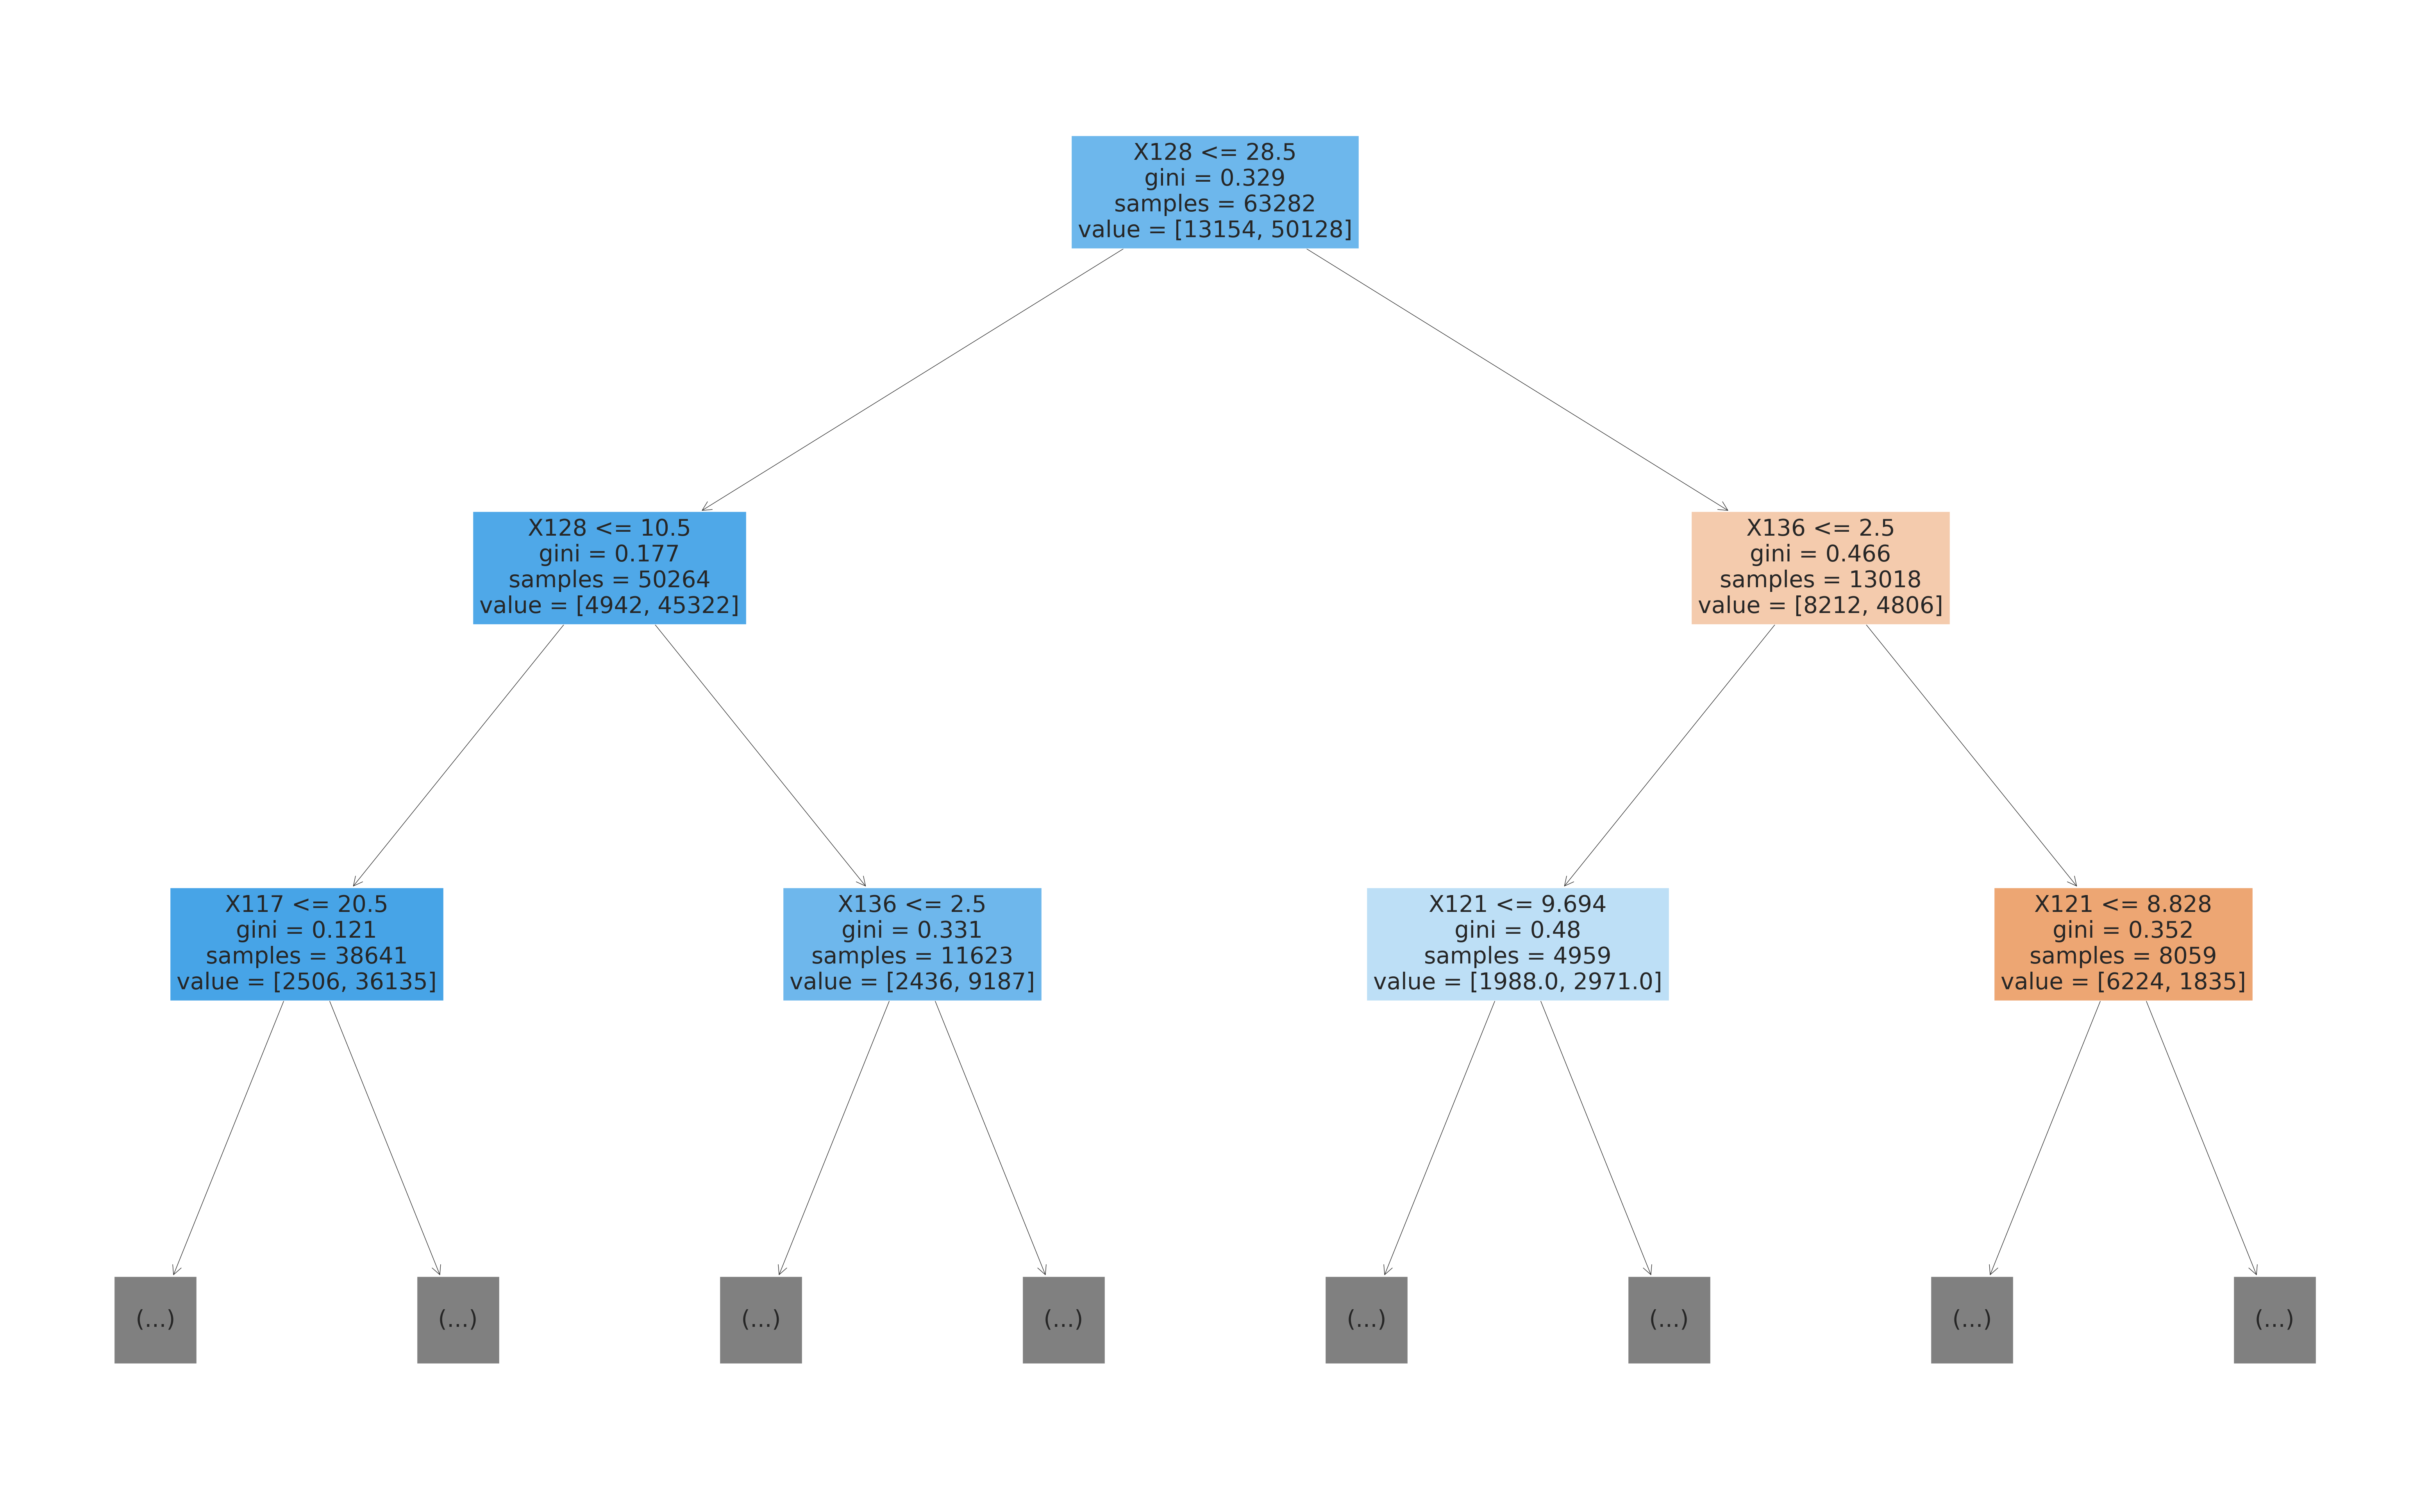

In [ ]:
plt.figure(figsize=(80,50))
plot_tree(model, feature_names=train_input_df[train_columns].columns, max_depth=2, filled=True);

In [ ]:
model.tree_.max_depth


45

In [ ]:
tree_text = export_text(model, max_depth=10, feature_names=list(train_input_df[train_columns].columns))
print(tree_text[:5000])

|--- X128 <= 28.50
|   |--- X128 <= 10.50
|   |   |--- X117 <= 20.50
|   |   |   |--- X136 <= 2.50
|   |   |   |   |--- X35 <= 20.50
|   |   |   |   |   |--- X49 <= 5.50
|   |   |   |   |   |   |--- X5 <= 8.50
|   |   |   |   |   |   |   |--- X135 <= 7.50
|   |   |   |   |   |   |   |   |--- X118 <= 3.50
|   |   |   |   |   |   |   |   |   |--- X108 <= 25.50
|   |   |   |   |   |   |   |   |   |   |--- X64 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 34
|   |   |   |   |   |   |   |   |   |   |--- X64 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- X108 >  25.50
|   |   |   |   |   |   |   |   |   |   |--- X12 <= 9.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- X12 >  9.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- X118 >  3.50
|   |   |   |   |   |   |   |   |   |--- X138 <= 10.50

In [ ]:
model.feature_importances_

array([7.40620709e-03, 7.36510558e-03, 3.80013148e-03, 8.03212455e-03,
       6.97390849e-03, 7.62434429e-03, 7.51327806e-03, 1.02651094e-02,
       8.57030402e-03, 6.57778826e-03, 6.77232841e-03, 5.05475038e-03,
       7.21563431e-03, 8.05888103e-03, 7.96971984e-03, 8.49749337e-03,
       7.24389285e-03, 1.01922056e-02, 7.98204759e-03, 1.00926578e-02,
       1.03503309e-02, 6.39416734e-03, 9.85812782e-03, 1.28048396e-02,
       3.35837758e-03, 6.44502611e-03, 4.84340044e-03, 4.32157476e-03,
       5.04384327e-03, 2.98303064e-03, 4.39334686e-03, 5.94658350e-03,
       4.35283508e-03, 4.41745168e-03, 9.09928013e-05, 3.47553650e-03,
       7.02086003e-03, 3.33007079e-03, 8.83739305e-05, 0.00000000e+00,
       3.01179820e-04, 7.83503795e-03, 1.16215257e-02, 1.40169625e-02,
       6.15420939e-03, 7.63174143e-03, 6.66309303e-03, 1.18527166e-02,
       4.35617762e-03, 7.68702855e-03, 7.33514908e-03, 6.83358097e-03,
       7.58133681e-03, 6.67149118e-03, 6.17861530e-03, 5.52731573e-03,
      

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_input_df[train_columns].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.sort_values(by=['importance'],ascending=False)

,feature,importance
84,X128,0.309544
87,X136,0.053043
79,X121,0.029519
77,X117,0.023271
43,X77,0.014017
...,...,...
82,X126,0.000428
40,X69,0.000301
34,X50,0.000091
38,X64,0.000088


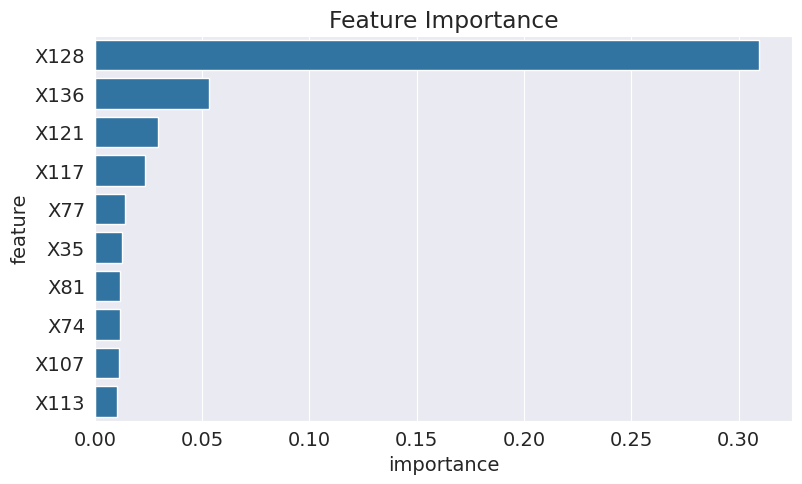

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Decision Tree Hyperparameter Tuning

In [ ]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
%%time
model.fit(train_input_df[train_columns],train_label_df)

CPU times: user 579 ms, sys: 12.5 ms, total: 591 ms
Wall time: 594 ms


DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
train_preds = model.predict(train_input_df[train_columns])
train_preds

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
accuracy_score(train_label_df,train_preds)

0.8655383837426124

In [ ]:
val_preds = model.predict(val_input_df[train_columns])
val_preds

array([0, 1, 1, ..., 0, 1, 1])

In [ ]:
accuracy_score(val_label_df,val_preds)

0.8628584972742356

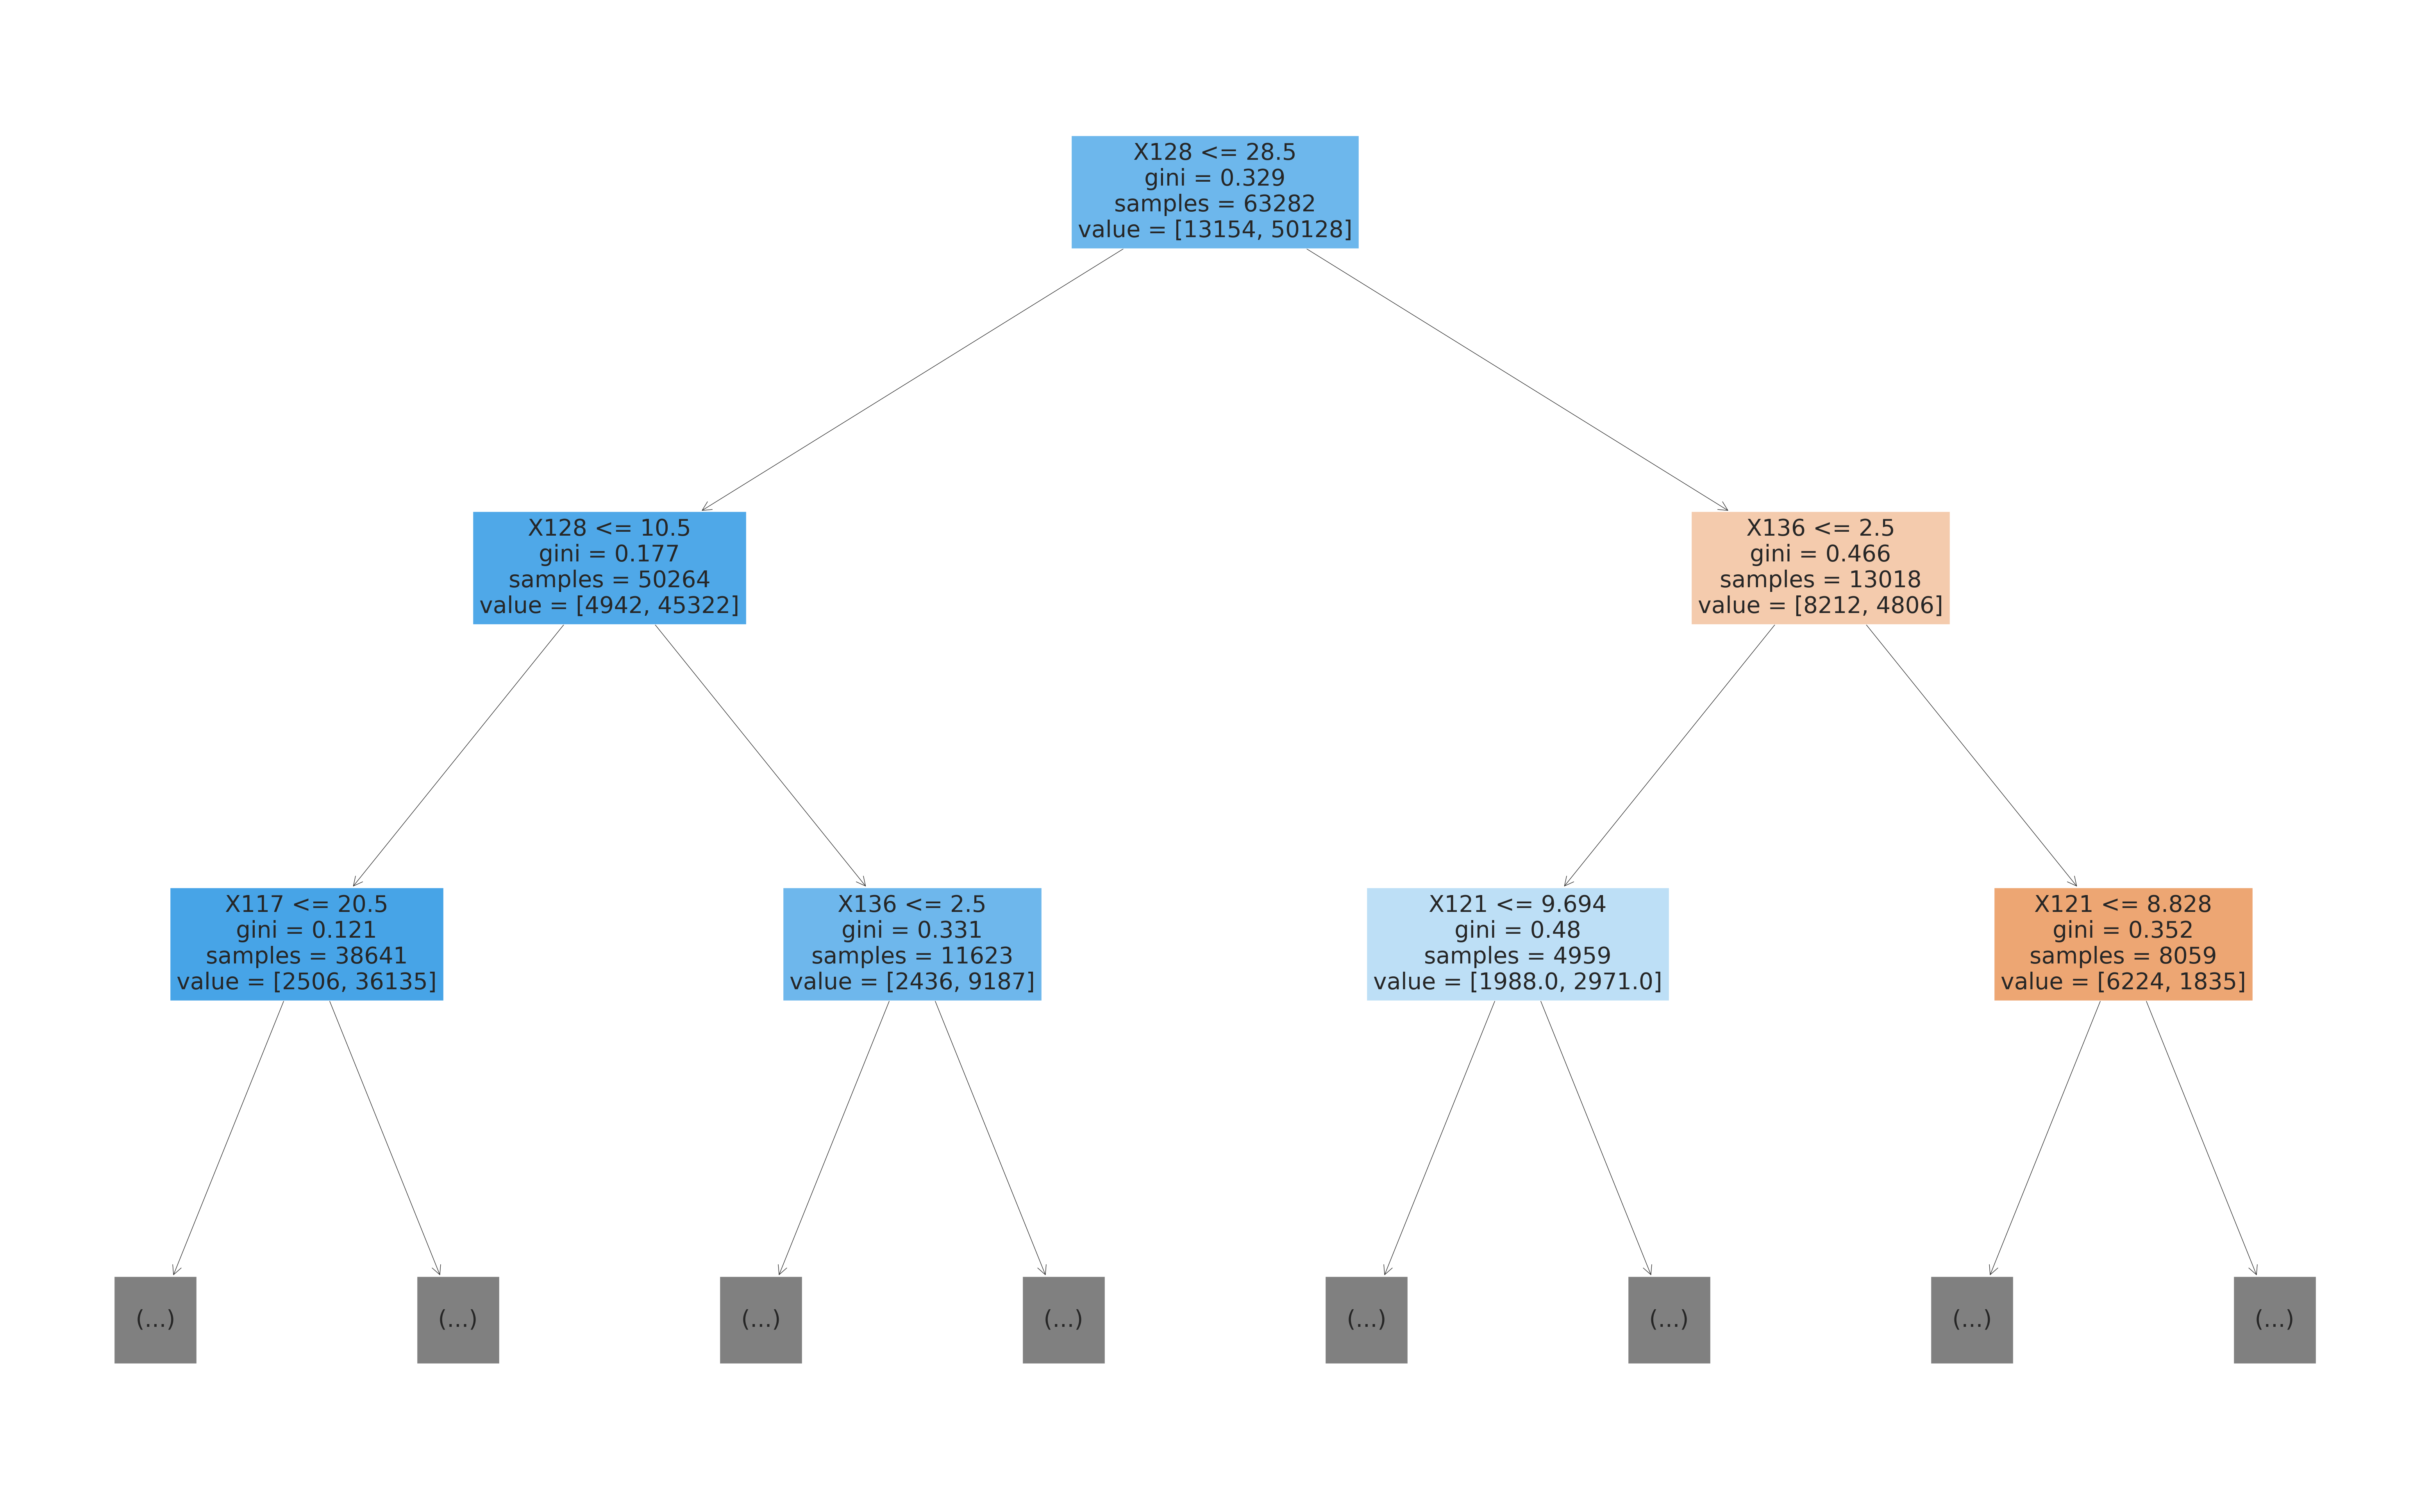

In [ ]:
plt.figure(figsize=(80,50))
plot_tree(model, feature_names=train_input_df[train_columns].columns, max_depth=2, filled=True);

### Training the decision tree model for different max-depth parameter

In [ ]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(train_input_df[train_columns], train_label_df)
    train_acc = 1 - model.score(train_input_df[train_columns],train_label_df)
    val_acc = 1 - model.score(val_input_df[train_columns],val_label_df)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 50.8 s, sys: 516 ms, total: 51.3 s
Wall time: 59.3 s


In [ ]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.154041,0.156056
1,2,0.138507,0.140128
2,3,0.134462,0.137142
3,4,0.132376,0.134629
4,5,0.128062,0.131026
5,6,0.125091,0.131311
6,7,0.121346,0.130552
7,8,0.114962,0.132828
8,9,0.109036,0.134250
9,10,0.100898,0.138611


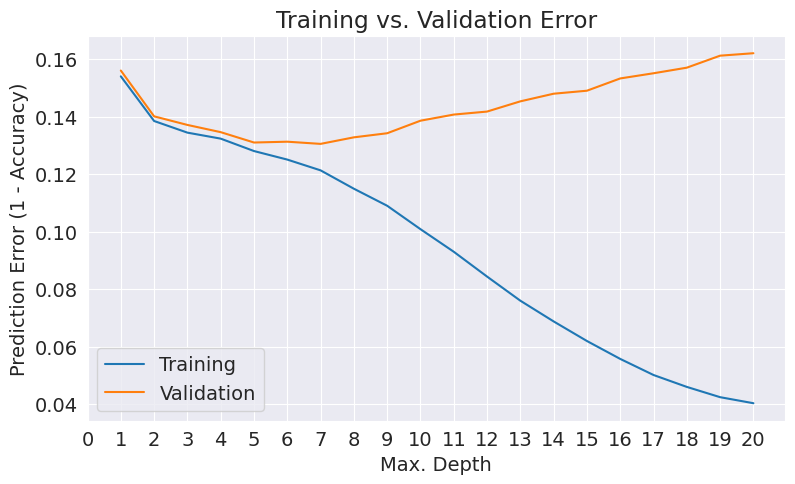

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [ ]:
model = DecisionTreeClassifier(max_depth=7, random_state=42).fit(train_input_df[train_columns], train_label_df)
model.score(train_input_df[train_columns],train_label_df)

0.8786542776776967

In [ ]:
model.score(val_input_df[train_columns],val_label_df)

0.8694477364304337

In [ ]:
f1_score(val_label_df,val_preds)

0.9163945322659885

### Testing

In [ ]:
test_path = cwd+'/stay-or-stray/test.csv'
test_df = pd.read_csv(test_path)
test_df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139
0,17547.0,1.272727,0.0,1.0,0.0,3.0,0.0,0.0,7.0,26.0,...,NaN,NaN,NaN,0.0,2.0,6.0,2.0,4.0,3.0,NaN
1,140449.0,1.000000,0.0,1.0,NaN,1.0,NaN,0.0,8.0,4.0,...,0.0,0.0,NaN,0.0,3.0,2.0,2.0,2.0,5.0,NaN
2,182658.0,2.000000,NaN,2.0,NaN,2.0,NaN,0.0,64.0,2.0,...,NaN,NaN,NaN,NaN,2.0,4.0,1.0,1.0,7.0,0.0
3,149652.0,1.000000,0.0,1.0,NaN,1.0,0.0,0.0,9.0,9.0,...,NaN,NaN,NaN,NaN,3.0,1.0,1.0,2.0,7.0,NaN
4,106304.0,2.000000,NaN,2.0,NaN,3.0,NaN,0.0,1.0,6.0,...,NaN,NaN,NaN,0.0,1.0,2.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,102422.0,1.000000,NaN,2.0,NaN,1.0,NaN,NaN,10.0,7.0,...,NaN,0.0,NaN,0.0,3.0,1.0,1.0,2.0,3.0,NaN
35978,129387.0,2.076923,0.0,1.0,0.0,3.0,0.0,0.0,6.0,5.0,...,NaN,NaN,NaN,0.0,2.0,2.0,2.0,2.0,2.0,0.0
35979,131835.0,1.000000,NaN,1.0,0.0,1.0,NaN,NaN,7.0,9.0,...,NaN,NaN,NaN,NaN,3.0,1.0,2.0,1.0,7.0,NaN
35980,68715.0,1.500000,NaN,23.0,0.0,6.0,NaN,NaN,2.0,22.0,...,0.0,0.0,0.0,0.0,1.0,4.0,1.0,1.0,9.0,NaN


In [ ]:
# Drop the columns
test_df.drop(top_na_columns.index,axis=1,inplace=True)

In [ ]:
test_df[imput_cols] = imputer.transform(test_df[imput_cols])

In [ ]:
test_df[imput_cols].isna().sum()

X1      0
X3      0
X5      0
X8      0
X9      0
       ..
X134    0
X135    0
X136    0
X137    0
X138    0
Length: 90, dtype: int64

In [ ]:
test_df[train_columns]

,X1,X3,X5,X8,X9,X10,X11,X12,X13,X14,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,1.272727,1.0,3.0,7.0,26.0,48.0,8.0,8.0,9.0,36.0,...,10.0,1.0,1.0,19.0,42.0,2.0,6.0,2.0,4.0,3.0
1,1.000000,1.0,1.0,8.0,4.0,5.0,3.0,1.0,6.0,2.0,...,1.0,1.0,1.0,17.0,3.0,3.0,2.0,2.0,2.0,5.0
2,2.000000,2.0,2.0,64.0,2.0,7.0,8.0,14.0,19.0,4.0,...,13.0,1.0,1.0,16.0,12.0,2.0,4.0,1.0,1.0,7.0
3,1.000000,1.0,1.0,9.0,9.0,10.0,1.0,15.0,19.0,5.0,...,2.0,1.0,1.0,16.0,3.0,3.0,1.0,1.0,2.0,7.0
4,2.000000,2.0,3.0,1.0,6.0,4.0,2.0,4.0,4.0,18.0,...,1.0,1.0,1.0,7.0,1.0,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,1.000000,2.0,1.0,10.0,7.0,9.0,10.0,2.0,19.0,5.0,...,1.0,1.0,1.0,7.0,3.0,3.0,1.0,1.0,2.0,3.0
35978,2.076923,1.0,3.0,6.0,5.0,9.0,7.0,13.0,4.0,4.0,...,3.0,1.0,1.0,2.0,19.0,2.0,2.0,2.0,2.0,2.0
35979,1.000000,1.0,1.0,7.0,9.0,4.0,9.0,8.0,18.0,18.0,...,1.0,1.0,1.0,5.0,6.0,3.0,1.0,2.0,1.0,7.0
35980,1.500000,23.0,6.0,2.0,22.0,7.0,8.0,17.0,19.0,5.0,...,2.0,1.0,1.0,16.0,9.0,1.0,4.0,1.0,1.0,9.0


In [ ]:
test_pred = model.predict(test_df[train_columns])
test_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
pd.value_counts(test_pred)

1    30748
0     5234
dtype: int64

In [ ]:
ID = test_df['ID'].values
ID

array([ 17547., 140449., 182658., ..., 131835.,  68715.,  55601.])

In [ ]:
submission_df = pd.DataFrame(data={'ID':ID, 'label':test_pred})
submission_df

,ID,label
0,17547.0,1
1,140449.0,1
2,182658.0,1
3,149652.0,1
4,106304.0,1
...,...,...
35977,102422.0,1
35978,129387.0,1
35979,131835.0,1
35980,68715.0,1


In [ ]:
submission_df.to_csv('./stay-or-stray/submission_decision_tree.csv', index=None)

### Training the decision tree model for different max-leaf-node parameter

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=40, random_state=42)

In [ ]:
%%time
model.fit(train_input_df[train_columns], train_label_df)

CPU times: user 1.52 s, sys: 22.5 ms, total: 1.54 s
Wall time: 1.6 s


DecisionTreeClassifier(max_leaf_nodes=40, random_state=42)

In [ ]:
accuracy_score(train_label_df,train_preds)

0.8655383837426124

In [ ]:
accuracy_score(val_label_df,val_preds)

0.8628584972742356

In [ ]:
model.tree_.max_depth

7

### Training the model using RandomForest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
%%time
model.fit(train_input_df[train_columns],train_label_df)

CPU times: user 49.7 s, sys: 124 ms, total: 49.8 s
Wall time: 45.4 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model.score(train_input_df[train_columns], train_label_df)

0.999968395436301

In [ ]:
train_probs = model.predict_proba(train_input_df[train_columns])
train_probs

array([[0.05, 0.95],
       [0.02, 0.98],
       [0.  , 1.  ],
       ...,
       [0.03, 0.97],
       [0.03, 0.97],
       [0.03, 0.97]])

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_input_df[train_columns].columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
79,X121,0.050823
84,X128,0.050371
33,X49,0.049738
43,X77,0.044731
87,X136,0.035873
12,X17,0.032701
78,X118,0.028786
55,X92,0.028108
36,X56,0.020309
77,X117,0.018914


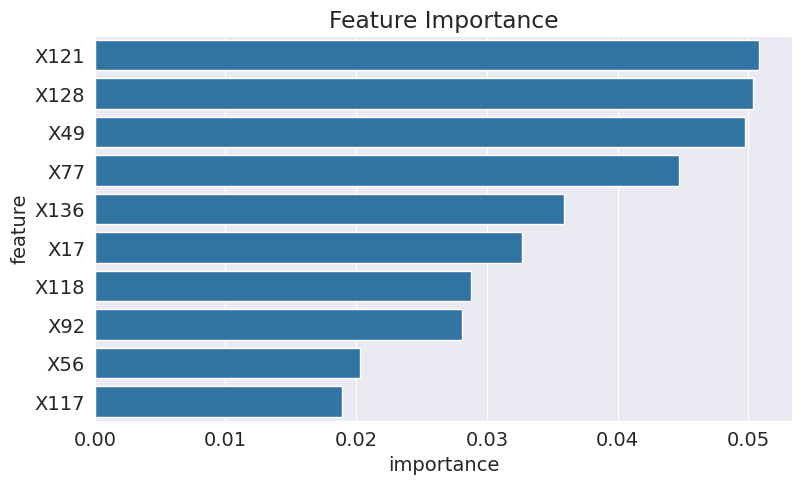

In [ ]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [ ]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_input_df[train_columns],train_label_df)
    train_acc = model.score(train_input_df[train_columns], train_label_df)
    val_acc = model.score(val_input_df[train_columns], val_label_df)
    #print("Train Accuracy: ",train_acc," Validation Accuracy Score: ",val_acc)
    return train_acc,val_acc

Check the accuracy of the model with decison tree features

In [ ]:
test_params(max_depth=5)

Train Accuracy:  0.8715590531272716  Validation Accuracy Score:  0.8687840720549893


In [ ]:
def test_max_depth(depth):
  train_acc, val_acc = test_params(max_depth=depth,n_estimators=15,bootstrap=False)
  train_error = 1 - train_acc
  val_error = 1 - val_acc
  return {'Max Depth': depth, 'Training Error': train_error, 'Validation Error': val_error}


In [ ]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 10)])

CPU times: user 12.2 s, sys: 206 ms, total: 12.4 s
Wall time: 16.6 s


In [ ]:
errors_df

,Max Depth,Training Error,Validation Error
0,1,0.154041,0.156056
1,2,0.138507,0.140128
2,3,0.134462,0.137142
3,4,0.132376,0.134629
4,5,0.128062,0.131026
5,6,0.125091,0.131311
6,7,0.121346,0.130552
7,8,0.114962,0.132828
8,9,0.109036,0.134250


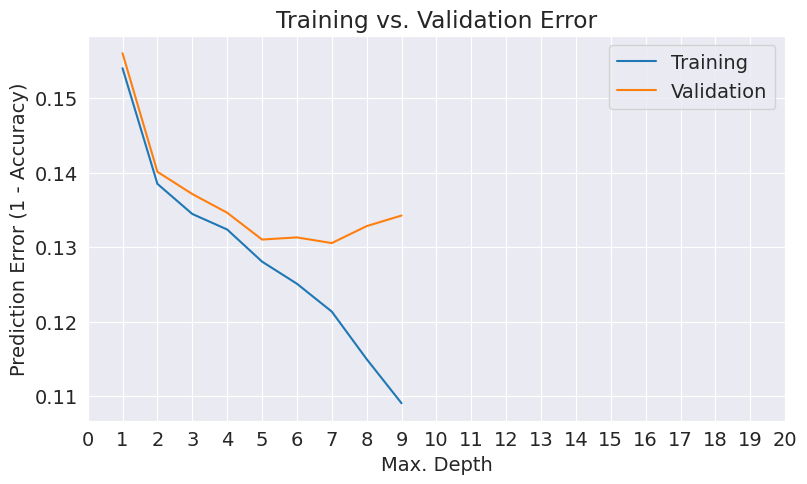

In [ ]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation'])

In [412]:
def test_max_features(feature):
  train_acc, val_acc = test_params(max_depth=7,n_estimators=8,max_features=feature)
  train_error = 1 - train_acc
  val_error = 1 - val_acc
  return {'Max Features': feature, 'Training Error': train_error, 'Validation Error': val_error}

In [423]:
%%time
errors_df = pd.DataFrame([test_max_features(md) for md in range(30,46)])

CPU times: user 1min 27s, sys: 493 ms, total: 1min 28s
Wall time: 1min 2s


In [424]:
errors_df

,Max Features,Training Error,Validation Error
0,30,0.117680,0.127850
1,31,0.118011,0.128514
2,32,0.117364,0.127234
3,33,0.116921,0.127661
4,34,0.117095,0.127898
5,35,0.118596,0.129367
6,36,0.117711,0.127187
7,37,0.119149,0.128372
8,38,0.117569,0.129130
9,39,0.117364,0.128277


In [425]:
%%time
model = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=7,n_estimators=8,max_features=36)
model.fit(train_input_df[train_columns],train_label_df)
print("Training accuracy: ",model.score(train_input_df[train_columns],train_label_df))
print("Validation accuracy: ",model.score(val_input_df[train_columns],val_label_df))

Training accuracy:  0.8817831294838975
Validation accuracy:  0.8719601801374733
CPU times: user 4.31 s, sys: 41.4 ms, total: 4.35 s
Wall time: 3.92 s


In [422]:
# %%time
# model = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=7,n_estimators=10,max_features='log2')
# model.fit(train_input_df[train_columns],train_label_df)
# print("Training accuracy: ",model.score(train_input_df[train_columns],train_label_df))
# print("Validation accuracy: ",model.score(val_input_df[train_columns],val_label_df))

Training accuracy:  0.8752567870800544
Validation accuracy:  0.8678833846883147
CPU times: user 1.24 s, sys: 30.7 ms, total: 1.27 s
Wall time: 2.04 s


In [ ]:
# %%time
# model = RandomForestClassifier(random_state=42, n_jobs=-1,max_depth=6,n_estimators=10,bootstrap=False, class_weight='balanced')
# model.fit(train_input_df[train_columns],train_label_df)
# print("Training accuracy: ",model.score(train_input_df[train_columns],train_label_df))
# print("Validation accuracy: ",model.score(val_input_df[train_columns],val_label_df))

Training accuracy:  0.8332385196422364
Validation accuracy:  0.8291538279213083
CPU times: user 2.02 s, sys: 5.89 ms, total: 2.02 s
Wall time: 1.62 s


### Testng

In [ ]:
test_df[train_columns]

,X1,X3,X5,X8,X9,X10,X11,X12,X13,X14,...,X122,X125,X126,X127,X128,X134,X135,X136,X137,X138
0,1.272727,1.0,3.0,7.0,26.0,48.0,8.0,8.0,9.0,36.0,...,10.0,1.0,1.0,19.0,42.0,2.0,6.0,2.0,4.0,3.0
1,1.000000,1.0,1.0,8.0,4.0,5.0,3.0,1.0,6.0,2.0,...,1.0,1.0,1.0,17.0,3.0,3.0,2.0,2.0,2.0,5.0
2,2.000000,2.0,2.0,64.0,2.0,7.0,8.0,14.0,19.0,4.0,...,13.0,1.0,1.0,16.0,12.0,2.0,4.0,1.0,1.0,7.0
3,1.000000,1.0,1.0,9.0,9.0,10.0,1.0,15.0,19.0,5.0,...,2.0,1.0,1.0,16.0,3.0,3.0,1.0,1.0,2.0,7.0
4,2.000000,2.0,3.0,1.0,6.0,4.0,2.0,4.0,4.0,18.0,...,1.0,1.0,1.0,7.0,1.0,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,1.000000,2.0,1.0,10.0,7.0,9.0,10.0,2.0,19.0,5.0,...,1.0,1.0,1.0,7.0,3.0,3.0,1.0,1.0,2.0,3.0
35978,2.076923,1.0,3.0,6.0,5.0,9.0,7.0,13.0,4.0,4.0,...,3.0,1.0,1.0,2.0,19.0,2.0,2.0,2.0,2.0,2.0
35979,1.000000,1.0,1.0,7.0,9.0,4.0,9.0,8.0,18.0,18.0,...,1.0,1.0,1.0,5.0,6.0,3.0,1.0,2.0,1.0,7.0
35980,1.500000,23.0,6.0,2.0,22.0,7.0,8.0,17.0,19.0,5.0,...,2.0,1.0,1.0,16.0,9.0,1.0,4.0,1.0,1.0,9.0


In [426]:
test_pred = model.predict(test_df[train_columns])
test_pred

array([0, 1, 1, ..., 1, 1, 1])

In [427]:
pd.value_counts(test_pred)

1    30786
0     5196
dtype: int64

In [428]:
ID = test_df['ID'].values
ID

array([ 17547., 140449., 182658., ..., 131835.,  68715.,  55601.])

In [429]:
submission_df = pd.DataFrame(data={'ID':ID, 'label':test_pred})
submission_df

,ID,label
0,17547.0,0
1,140449.0,1
2,182658.0,1
3,149652.0,1
4,106304.0,1
...,...,...
35977,102422.0,1
35978,129387.0,1
35979,131835.0,1
35980,68715.0,1


In [430]:
submission_df.to_csv('./stay-or-stray/submission_random_forest.csv', index=None)